
# 🎓 Student Performance Analysis with NumPy & Seaborn

## 🎯 Objective:
Explore how study habits, attendance, and other factors affect student performance using:
- **Pandas** for data exploration
- **NumPy** for math operations
- **Seaborn** for clear visual patterns


In [1]:

import pandas as pd

# Load dataset
df = pd.read_csv("student_performance_data.csv")

# Preview
df.head()

,StudentID,StudyHours,SleepHours,AttendanceRate,Participation,TestScore
0,1,7.06,8.11,82.20,3.16,79.86
1,2,3.94,5.38,95.63,6.64,66.87
2,3,4.36,NaN,100.00,8.01,NaN
3,4,3.76,NaN,91.96,6.66,68.05
4,5,3.98,6.54,86.54,7.84,63.20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StudentID       100 non-null    int64  
 1   StudyHours      97 non-null     float64
 2   SleepHours      97 non-null     float64
 3   AttendanceRate  100 non-null    float64
 4   Participation   100 non-null    float64
 5   TestScore       97 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [5]:
df.describe()

,StudentID,StudyHours,SleepHours,AttendanceRate,Participation,TestScore
count,100.000000,97.000000,97.000000,100.000000,100.000000,97.000000
mean,50.500000,3.251649,6.452784,85.237000,5.966600,59.403608
std,29.011492,1.558961,1.027601,9.988643,2.089859,11.490708
min,1.000000,0.000000,4.000000,57.640000,0.890000,29.060000
25%,25.750000,2.080000,5.730000,77.247500,4.520000,51.310000
50%,50.500000,3.290000,6.540000,86.330000,6.050000,60.000000
75%,75.250000,4.080000,7.150000,93.610000,7.422500,67.880000
max,100.000000,7.060000,8.990000,100.000000,10.000000,86.940000


In [7]:
df.isnull().sum()

StudentID         0
StudyHours        3
SleepHours        3
AttendanceRate    0
Participation     0
TestScore         3
dtype: int64

In [9]:
df_clean = df.dropna()
df_clean.head()

,StudentID,StudyHours,SleepHours,AttendanceRate,Participation,TestScore
0,1,7.06,8.11,82.20,3.16,79.86
1,2,3.94,5.38,95.63,6.64,66.87
4,5,3.98,6.54,86.54,7.84,63.20
5,6,2.52,6.09,86.68,8.70,59.98
6,7,1.73,5.73,77.34,5.24,45.57


In [13]:

import numpy as np

study = df_clean['StudyHours'].to_numpy()
score = df_clean['TestScore'].to_numpy()

print("Mean Study Hours:", np.mean(study))
print("Std Dev Score:", np.std(score))

Mean Study Hours: 3.248804347826087
Std Dev Score: 11.587120246722383


In [15]:
corr = np.corrcoef(study, score)[0, 1]
print("Correlation (Study vs Score):", corr)

Correlation (Study vs Score): 0.6798605268246634


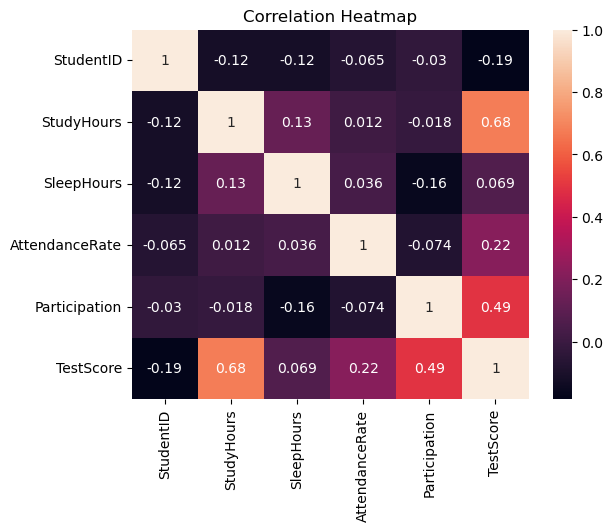

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_clean.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

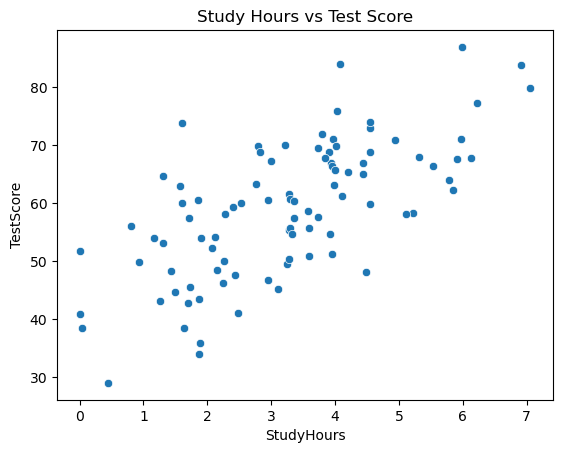

In [19]:
sns.scatterplot(x='StudyHours', y='TestScore', data=df_clean)
plt.title("Study Hours vs Test Score")
plt.show()

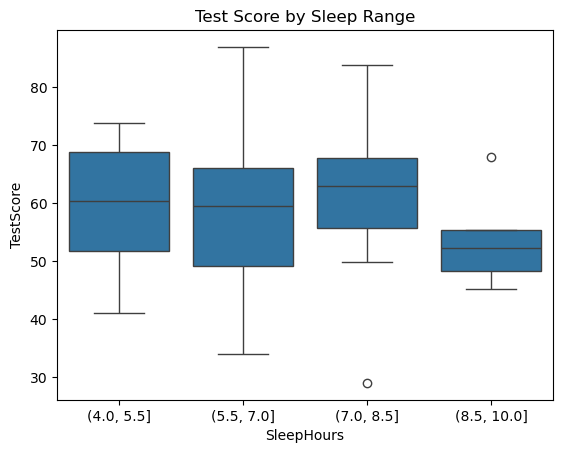

In [21]:
sns.boxplot(x=pd.cut(df_clean['SleepHours'], bins=[4, 5.5, 7, 8.5, 10]), y='TestScore', data=df_clean)
plt.title("Test Score by Sleep Range")
plt.show()

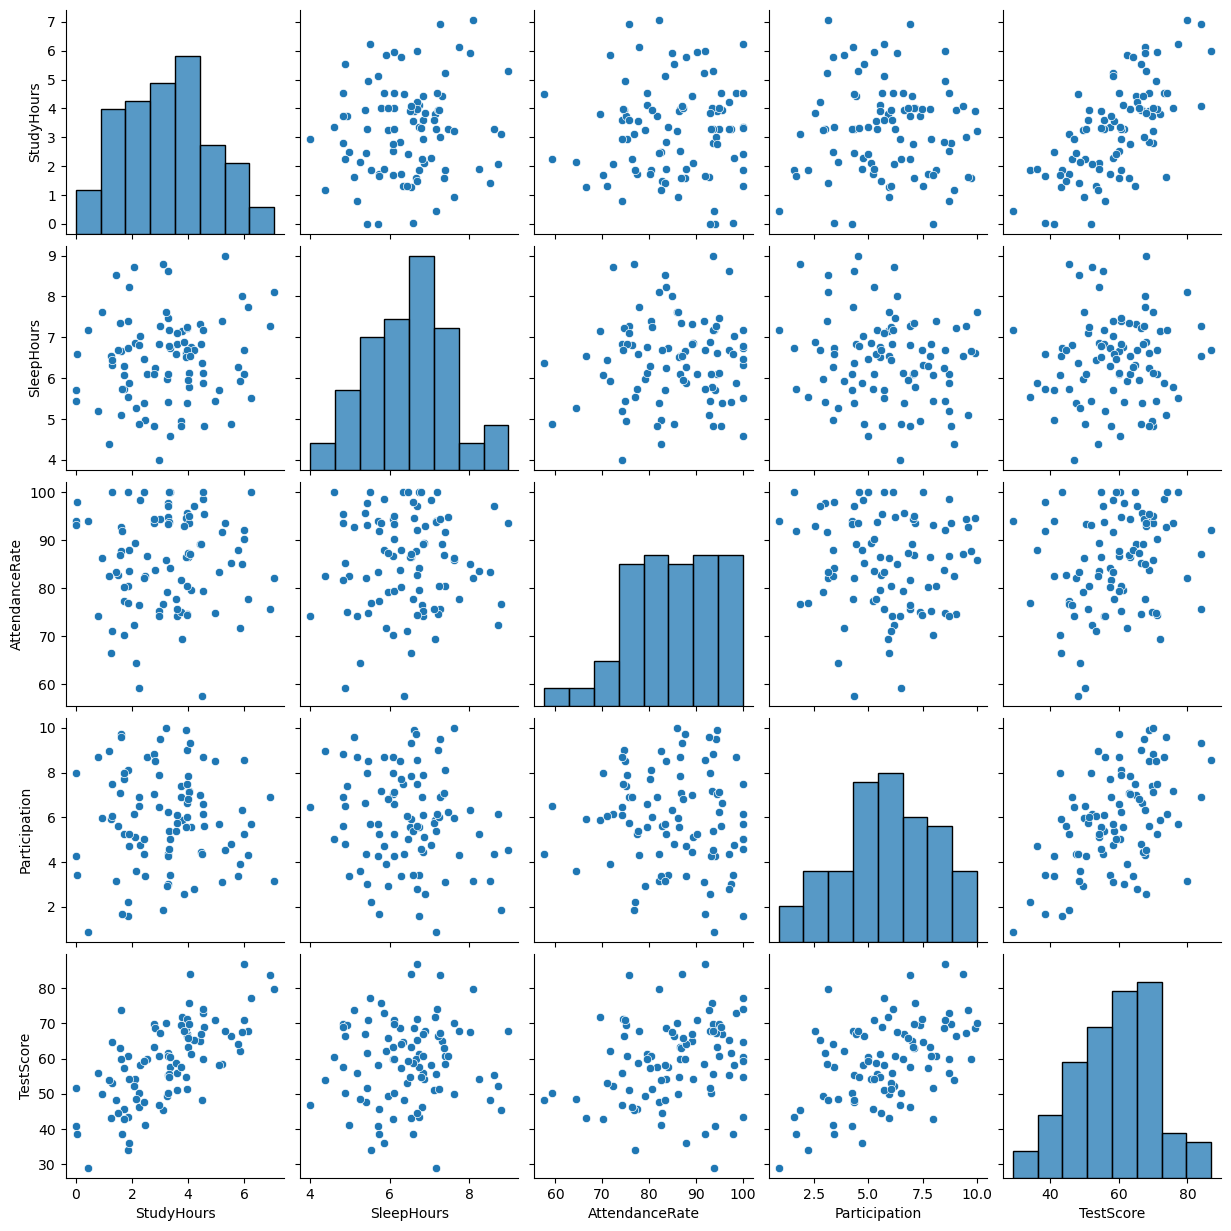

In [23]:
sns.pairplot(df_clean[['StudyHours', 'SleepHours', 'AttendanceRate', 'Participation', 'TestScore']])
plt.show()

---

## 🧠 Five Why's Example

**Observation**: "Low sleep leads to lower test scores"

| Why # | Question | Answer |
|-------|----------|--------|
| 1     | Why low scores? | Poor sleep reduces focus. |
| 2     | Why reduced focus? | Brain didn't rest. |
| 3     | Why no rest? | Late night study or distractions. |
| 4     | Why late night? | Poor time management. |
| 5     | Why that? | Lack of planning or structure. |
